# Activities

## Get data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import necessary libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data import Bellabeat
from activities import Activities

In [3]:
ac = Activities()

In [4]:
activities_df = ac.clean_data()

In [5]:
id_1 = activities_df[activities_df["id"] == 1503960366]

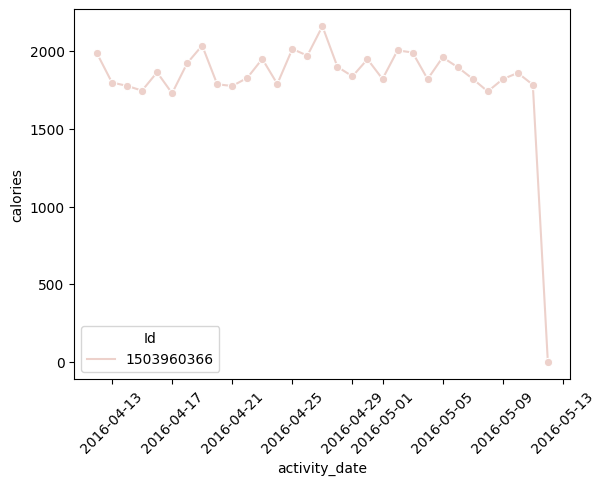

In [6]:
# Test plot
plt.figure()
sns.lineplot(data=id_1, x="activity_date", y="calories", hue="id", marker="o")
plt.xticks(rotation=45)
plt.legend(title="Id")
plt.show()

In [7]:
ac.clean_data()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [8]:
# Calculate the mean steps per user
user_activity_level = activities_df.groupby('id')['total_steps'].mean().reset_index()
user_activity_level = user_activity_level.rename(columns={'total_steps': 'user_activity_level'})

# Categorize user activity level
bins = [0, 4999, 7499, 9999, float('inf')]
labels = ['sedentary', 'slightly_active', 'fairly_active', 'very_active']
user_activity_level['activity_category'] = pd.cut(user_activity_level['user_activity_level'], bins=bins, labels=labels)

# Calculate the percentage of users in each activity level
activity_counts = user_activity_level['activity_category'].value_counts(normalize=True) * 100
activity_percentage = activity_counts.reset_index()
activity_percentage.columns = ['activity_level', 'percentage']

# Display the percentage distribution
print(activity_percentage)

# Merge the categorized activity level back into the original df
new_df = activities_df.merge(user_activity_level[['id', 'activity_category']], on='id', how='left')

    activity_level  percentage
0  slightly_active   27.272727
1    fairly_active   27.272727
2        sedentary   24.242424
3      very_active   21.212121


In [9]:
new_df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,activity_category
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,very_active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,very_active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,very_active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,very_active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,very_active


In [10]:
# Set the order for activity levels
activity_percentage['activity_level'] = pd.Categorical(activity_percentage['activity_level'], 
                                                       categories=['sedentary', 'slightly_active', 'fairly_active', 'very_active'],
                                                       ordered=True)

# Sort by the defined categorical order
activity_percentage = activity_percentage.sort_values('activity_level').reset_index(drop=True)

# Display the reordered result
print(activity_percentage)

    activity_level  percentage
0        sedentary   24.242424
1  slightly_active   27.272727
2    fairly_active   27.272727
3      very_active   21.212121


In [11]:
# Test python script
df = ac.get_activity_level()

In [12]:
df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,activity_level
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,very_active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,very_active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,very_active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,very_active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,very_active


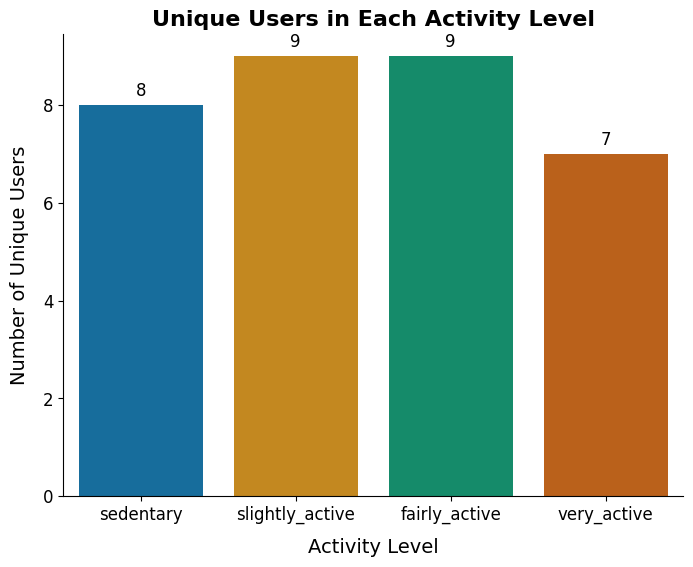

In [13]:
# Group by 'activity_category' and count the unique 'id' values
unique_user_counts = df.groupby('activity_level')['id'].nunique().reset_index()
unique_user_counts.columns = ['activity_level', 'unique_user_count']

# Create a bar plot with the unique user counts
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=unique_user_counts, x='activity_level', y='unique_user_count', palette="colorblind", order=["sedentary", "slightly_active", "fairly_active", "very_active"])

# Title and labels
plt.title('Unique Users in Each Activity Level', fontsize=16, fontweight='bold')
plt.xlabel('Activity Level', fontsize=14, labelpad=10)
plt.ylabel('Number of Unique Users', fontsize=14, labelpad=10)

# Additional styling
sns.despine()  # Removes the top and right borders for a cleaner look
plt.xticks(fontsize=12)  # Set the font size of x-tick labels
plt.yticks(fontsize=12)  # Set the font size of y-tick labels

for p in ax.patches:
    # Get the height of each bar (this is the count)
    height = p.get_height()
    # Add the text annotation at the top of each bar
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Position the text slightly above the bar
            int(height),  # The count value (rounded to an integer)
            ha="center",  # Horizontal alignment of the text
            va="bottom",  # Vertical alignment of the text
            fontsize=12,  # Font size
            color='black')  # Color of the text

# Export plot as png
plt.savefig("activity_category_users.jpeg", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [14]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'activity_level'],
      dtype='object')

In [15]:
# Calculate mean activity metrics for each user
user_activity_mean = df.groupby('id').mean().reset_index()

# Define activity thresholds 
runner_distance_threshold = 3.0  # Mean very active distance threshold for runners
runner_minutes_threshold = 20    # Mean very active minutes threshold for runners
walker_distance_threshold = 2.0  # Mean moderately or light active distance threshold for walkers
walker_minutes_threshold = 20    # Mean fairly active minutes threshold for walkers

# Create function to classify each user based on mean activity
def classify_user(row):
    if row['very_active_distance'] >= runner_distance_threshold and row['very_active_minutes'] >= runner_minutes_threshold:
        return 'runner'
    elif (row['moderately_active_distance'] >= walker_distance_threshold or 
          row['light_active_distance'] >= walker_distance_threshold) and row['fairly_active_minutes'] >= walker_minutes_threshold:
        return 'walker'
    else:
        return 'non-exerciser'

# Apply classification function to each user in grouped data
user_activity_mean['activity_type'] = user_activity_mean.apply(classify_user, axis=1)

# Merge the classification back into the original df
merged_df = df.merge(user_activity_mean[['id', 'activity_type']], on='id', how='left')

# Display a sample to check the results
print(merged_df[['id', 'activity_date', 'activity_type']].drop_duplicates(subset='id').head())

             id activity_date  activity_type
0    1503960366    2016-04-12  non-exerciser
31   1624580081    2016-04-12  non-exerciser
62   1644430081    2016-04-12         walker
92   1844505072    2016-04-12  non-exerciser
123  1927972279    2016-04-12  non-exerciser


In [16]:
merged_df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,activity_level,activity_type
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,very_active,non-exerciser
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,very_active,non-exerciser
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,very_active,non-exerciser
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,very_active,non-exerciser
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,very_active,non-exerciser


In [17]:
test_df = ac.get_activities_data()

In [18]:
# Test to see if all merges went as planned
if merged_df.equals(test_df):
    print("The DataFrames are identical.")
else:
    print("The DataFrames are not identical.")

The DataFrames are identical.


In [19]:
merged_df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'activity_level', 'activity_type'],
      dtype='object')

In [20]:
user_activity_mean.head()

,id,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,activity_type
0,1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355,non-exerciser
1,1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839,non-exerciser
2,1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000,walker
3,1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871,non-exerciser
4,1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452,non-exerciser


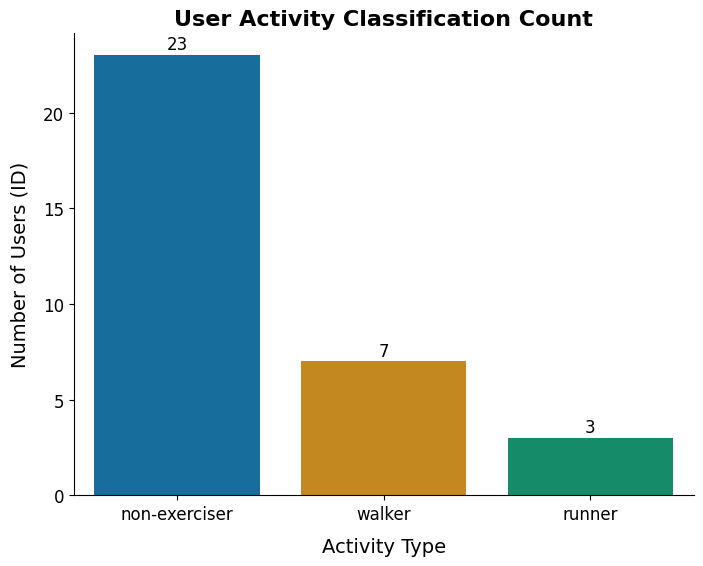

In [21]:
palette = sns.color_palette("colorblind", n_colors=len(user_activity_mean['activity_type'].unique()))

# Step 4: Create a bar plot with the aggregated data
plt.figure(figsize=(8, 6))
ax_1 = sns.countplot(data=user_activity_mean, x='activity_type', palette=palette)

# Title and labels
plt.title('User Activity Classification Count', fontsize=16, fontweight='bold')
plt.xlabel('Activity Type', fontsize=14, labelpad=10)
plt.ylabel('Number of Users (ID)', fontsize=14, labelpad=10)

# Additional styling
sns.despine()  # Removes the top and right borders for a cleaner look
plt.xticks(fontsize=12)  # Set the font size of x-tick labels
plt.yticks(fontsize=12)  # Set the font size of y-tick labels

for p in ax_1.patches:
    # Get the height of each bar (this is the count)
    height = p.get_height()
    # Add the text annotation at the top of each bar
    ax_1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Position the text slightly above the bar
            int(height),  # The count value (rounded to an integer)
            ha="center",  # Horizontal alignment of the text
            va="bottom",  # Vertical alignment of the text
            fontsize=12,  # Font size
            color='black')  # Color of the text


# Export plot to jpg
plt.savefig("activity_type_users.jpeg", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Conclusion

- There is a fairly even distribution of users according to their activity levels (sedentary, slightly active, fairly active, very active). 
- There are not many active exercisers (runners, walkers) compared to people who do neither.
- This leads me to conclude that there are many users who are naturally active in their daily lives without necessarily doing specific exercise (like running or walking). 

## Suggestions
- Do less marketing at gyms and swimming pools, and market more at bus stops and community centers. 
- Develop more features that track "regular" activities (like menstrual cycle, sleep, etc.) that is not as much exercise focused.